<a href="https://colab.research.google.com/github/sheetla-pandey/Code_Alpha_Internship_Project/blob/main/Code_Alpha_Car_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import Librarys ***

In [ ]:
# Importing necessary libraries for data analysis, visualization, model building, and evaluation
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for data visualization (basic plotting)
import seaborn as sns  # for advanced data visualization
from sklearn.model_selection import train_test_split  # to split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # to build the linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # to evaluate the model's performance


***Load Dataset***

In [ ]:
# Loading the dataset from local system into Google Colab
from google.colab import files
uploaded = files.upload()  # Opens file upload dialog to upload the dataset

# Reading the uploaded CSV file into a pandas DataFrame
df = pd.read_csv('car data.csv')  # Replace with your actual file name if different
df.head()  # Displaying the first 5 rows of the dataset to get an overview


Saving car data.csv to car data (2).csv


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


***Exploratory Data Analysis (EDA)***

In [ ]:
# Basic info about DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Summary statistics of numeric columns
df.describe()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# Total missing values in each column
df.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
# List of all column names in the DataFrame
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

***Feature Selection (X) and Target (y)***

In [ ]:
# Features (independent variables)
X = df.drop('Selling_Price', axis=1)

# Target (dependent variable)
y = df['Selling_Price']


***Train-Test Split***

In [ ]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


***Train Regression Model***

In [ ]:
# Create Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)


LinearRegression()

***Evaluate Model***

R2 Score: 0.5997023481244084
Mean Squared Error: 9.221090393053911


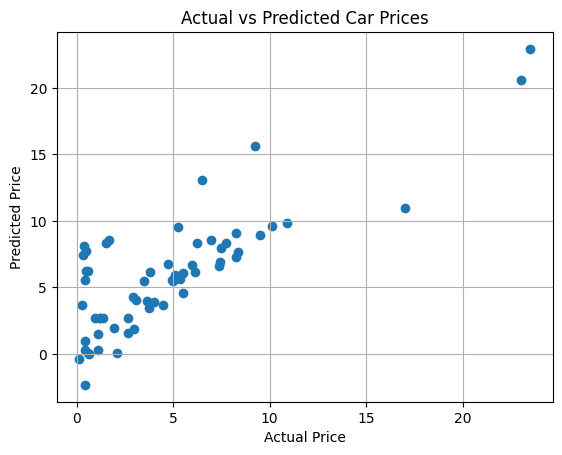

In [ ]:
# Predict car prices for test data
y_pred = model.predict(X_test)

# Print R² Score (how well the model fits the data)
print("R2 Score:", r2_score(y_test, y_pred))

# Print Mean Squared Error (average squared prediction error)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot Actual vs Predicted car prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
